# Sea Level Predictor Project

This booklet shows the analysis of the global mean sea level change data set since 1880 and its use to predict the sea level change through year 2050.

## Preparing the tools

Pandas, Matplotlib, and Scipy for data analysis and manipulation.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

## Import data and create a function to draw a plot that predict the sea level change

In [6]:
# Use Pandas to import the data from epa-sea-level.csv.
def draw_plot():
    df = pd.read_csv('epa-sea-level.csv')

# Create scatter plot
    df.plot(x='Year', 
            y='CSIRO Adjusted Sea Level', 
            kind='scatter')
    sp1 = pd.Series([int(i) for i in range(1880, 2050)])

# Create first line of best fit
    slope, intercept, r_value, p_value, std_err  = linregress(df['Year'], 
                                                              df["CSIRO Adjusted Sea Level"])
    plt.plot(sp1, 
             intercept + slope*sp1, 
             'r', 
             label='fitted line')

# Create second line of best fit
    df_recent = df[df['Year'] >= 2000]
    slope, intercept, r_value, p_value, std_err  = linregress(df_recent['Year'], 
                                                              df_recent["CSIRO Adjusted Sea Level"])

    sp2 = pd.Series([int(i) for i in range(2000, 2050)])
    df_recent.append(sp2, ignore_index=True)
    plt.plot(sp2, 
             intercept + slope*sp2, 
             'r', 
             label='fitted line', 
             color='blue')
    
# Add labels and title
    plt.title("Rise in Sea Level")
    plt.xlabel("Year")
    plt.ylabel("Sea Level (inches)")
    
# Save plot    
    plt.savefig('sea_level_plot.png')

C:\Users\jfalb\AppData\Local\Temp\ipykernel_4256\2868862176.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_recent.append(sp2, ignore_index=True)
C:\Users\jfalb\AppData\Local\Temp\ipykernel_4256\2868862176.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(sp2,


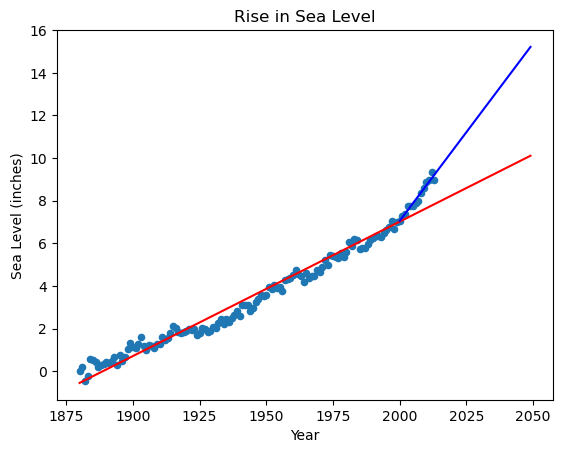

In [7]:
draw_plot()